In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_style("whitegrid")

In [17]:
# results from the run train01
train_path = Path("../runs/train01")

In [18]:
# train and valid loss
train_df = pd.read_csv(train_path / "results.csv")
train_df.head()

,Epoch,train_loss,val_loss,val_accuracy,val_auc,val_precision,val_recall,val_f1
0,1,0.701,0.691,0.510,0.715,0.260,0.510,0.344
1,2,0.680,0.675,0.569,0.789,0.620,0.569,0.525
2,3,0.678,0.669,0.490,0.708,0.465,0.490,0.412
3,4,0.659,0.663,0.569,0.748,0.620,0.569,0.525
4,5,0.668,0.658,0.569,0.723,0.766,0.569,0.463


Text(0, 0.5, 'Loss')

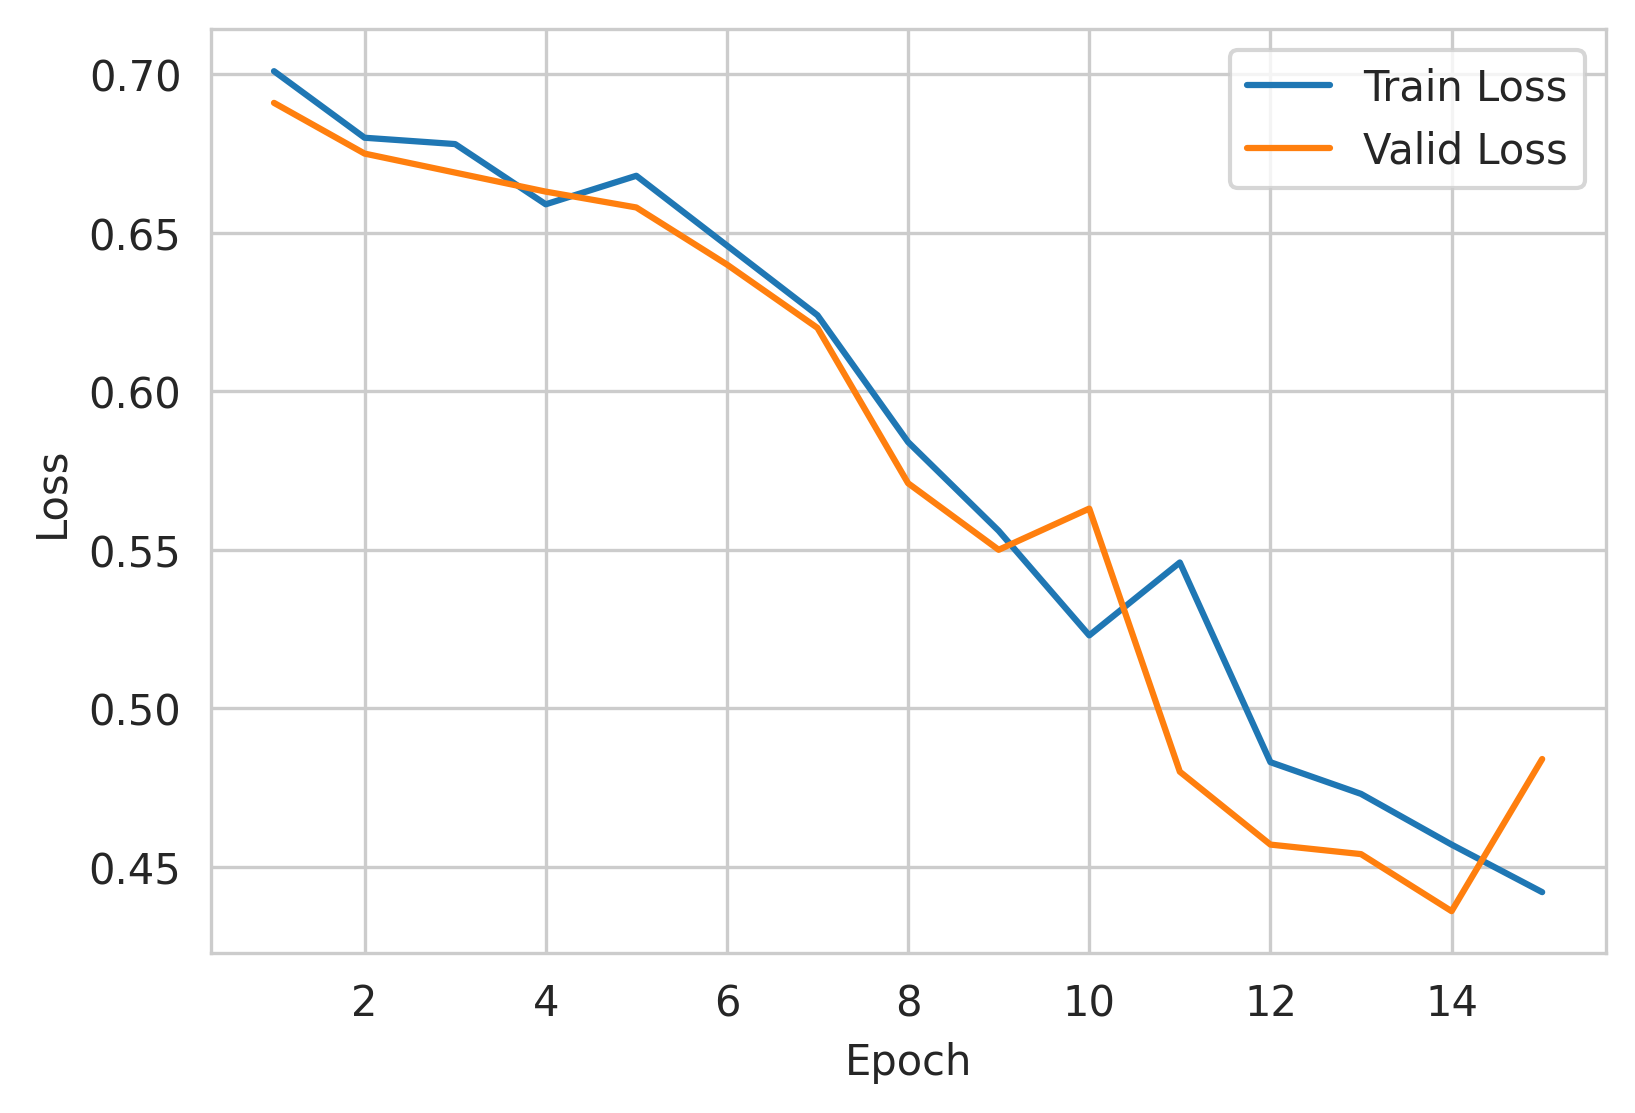

In [26]:
fig = plt.figure(figsize=(6, 4), dpi=300)
sns.lineplot(data=train_df, x="Epoch", y="train_loss", label="Train Loss")
sns.lineplot(data=train_df, x="Epoch", y="val_loss", label="Valid Loss")
plt.ylabel("Loss")